In [ ]:
import numpy as np
import torch
from matplotlib import pylab as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = np.load("/content/drive/My Drive/Colab Notebooks/burgers_prepped.npz")
u_in,u_out = data['u_in'],data['u_out']

In [ ]:
def do_a_path(samp):
    u0 = u_in[9*samp]
    u0 = u0.reshape((1,1,u_in.shape[1]))
    u0 = torch.tensor(u0,dtype=torch.float32)
    plt.figure()
    plt.plot(u0.numpy().flatten())
    with torch.no_grad():
        for i in range(10):
            uN = model(u0)
            u0[:,:,1:-1] += uN
            plt.plot(u0.numpy().flatten())
    plt.show()

In [ ]:
to_u_in = torch.tensor(u_in).reshape((u_in.shape[0],1,u_in.shape[1]))
to_u_out = torch.tensor(u_out-u_in[:,1:-1]).reshape((u_out.shape[0],1,u_out.shape[1]))

In [6]:
u_in.shape

(99, 21)

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,15,3),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,15,1),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,15,1),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,1,1)
)
loss = torch.nn.MSELoss()

In [ ]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [9]:
for t in range(10**5):
    if False:
        random_batch = [0]*10
        for i in range(0,10):
            random_batch[i] = np.random.choice(u_in.shape[0]-1)
        random_batch = torch.LongTensor(random_batch)
        batch_x = to_u_in.index_select(0,random_batch)
        batch_y = to_u_out.index_select(0,random_batch)
    else:
        batch_x = to_u_in
        batch_y = to_u_out
    y_pred = model(batch_x)
    lo = loss(y_pred, batch_y)
    if t % 1000 == 999:
        print(t, lo.item())
    optimizer.zero_grad()
    lo.backward()
    optimizer.step()

999 0.03263871371746063
1999 0.012338211759924889
2999 0.007818509824573994
3999 0.006251180544495583
4999 0.005645900033414364
5999 0.0053640916012227535
6999 0.005194236524403095
7999 0.005103757604956627
8999 0.005051076877862215
9999 0.00501647824421525
10999 0.004996845033019781
11999 0.004984657745808363
12999 0.0049748714081943035
13999 0.0049667139537632465
14999 0.004961064085364342
15999 0.0049559674225747585
16999 0.004951236303895712
17999 0.004947760608047247
18999 0.004944860935211182
19999 0.004942517727613449
20999 0.004940358456224203
21999 0.00493864668533206
22999 0.004936843644827604
23999 0.004935534205287695
24999 0.0049344627186656
25999 0.004933482967317104
26999 0.004932542331516743
27999 0.004931518342345953
28999 0.004930740222334862
29999 0.004929801449179649
30999 0.004929097834974527
31999 0.004928253591060638
32999 0.004927704576402903
33999 0.004927291534841061
34999 0.004926533903926611
35999 0.004926047287881374
36999 0.004925587680190802
37999 0.00492

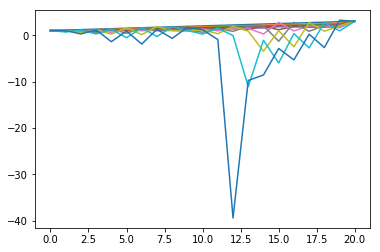

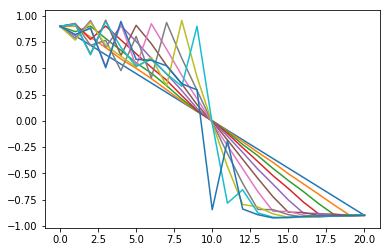

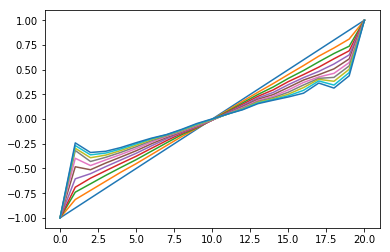

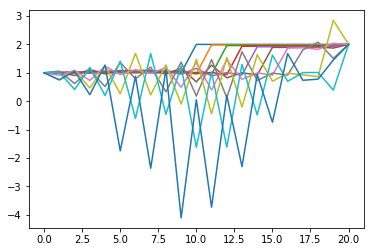

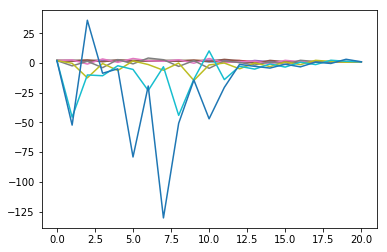

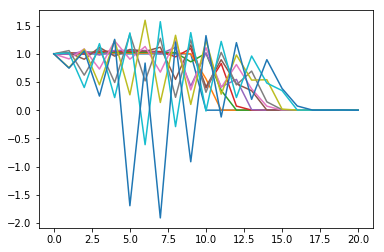

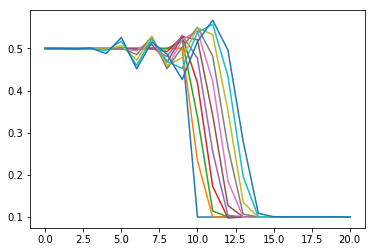

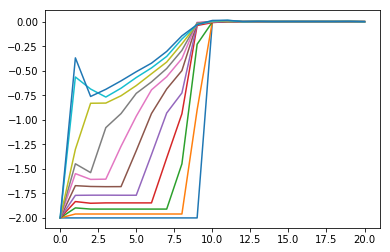

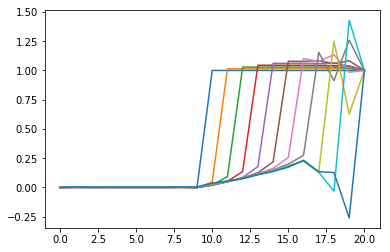

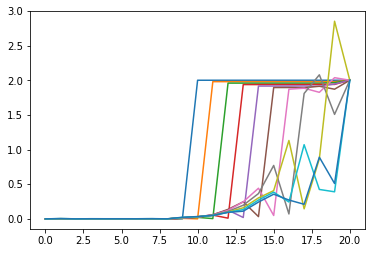

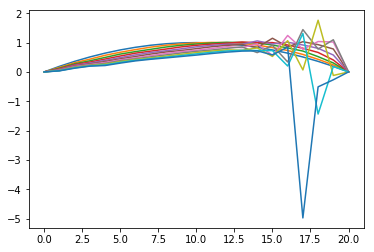

In [13]:
for i in range(11):
    do_a_path(i)